# Most_relevant_features

trainfull : (1460, 81)
testfull : (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         146

A_Préparation_des_données.ipynb:2: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  "cells": [
A_Préparation_des_données.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  {
A_Préparation_des_données.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "cells": [
A_Préparation_des_données.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

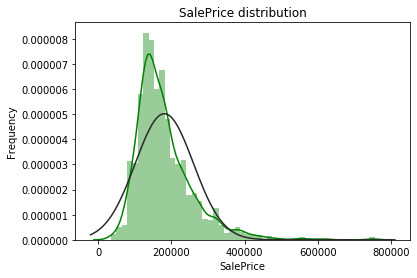

Skewness: 1.882876
Kurtosis: 6.536282


B_Exploration_des_données_outliers_sans_détail.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  {


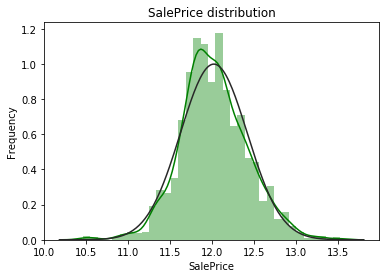

C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
B_Exploration_des_données_outliers_sans_détail.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  {


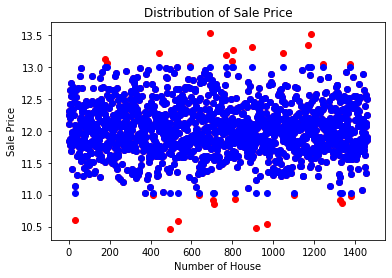

C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\h5py\_hl\base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,
Using TensorFlow backend.
C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\tensorflow_core\python\keras\backend.py:5747: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\Utilisateur\\.keras\\keras.json' mode='r' encoding='cp1252'>
  _config = json.load(open(_config_path))
C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary inco

AttributeError: module 'tensorflow._api.v1.random' has no attribute 'set_seed'

In [1]:
%run C_All_features_dummies.ipynb

In [2]:
y = train['SalePrice']
train_all = train_dummies

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(train_all,y, 
                                                    test_size=0.3, 
                                                    random_state=42)

print('Our training target/prediction variable contains :',len(y_train) ,'rows')
print('Our training input variables contains :',len(X_train) ,'rows')
print('Our testing target/prediction variables contains :',len(y_test) ,'rows')
print('Our testing input variable contains :',len(X_test) ,'rows')

Our training target/prediction variable contains : 1001 rows
Our training input variables contains : 1001 rows
Our testing target/prediction variables contains : 429 rows
Our testing input variable contains : 429 rows


In [4]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[20:27:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [5]:
from collections import OrderedDict
feat_imp = OrderedDict(sorted(model_xgb.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))
feat_imp

#Let's remove the less important ones 
most_relevant_features= list(dict((k, v) for k, v in model_xgb.get_booster().get_fscore().items() if v >= 10).keys())
print(most_relevant_features)

['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'OverallCond', 'LotArea', 'BsmtFinSF1', 'YearRemodAdd', 'BsmtUnfSF', 'LotFrontage', 'GarageYrBlt', '1stFlrSF', 'SaleCondition_Abnorml', 'OpenPorchSF']


In [6]:
train_best = train_all[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'OverallCond', 'LotArea', 'BsmtFinSF1', 'YearRemodAdd', 'BsmtUnfSF', 'LotFrontage', 'GarageYrBlt', '1stFlrSF', 'SaleCondition_Abnorml', 'OpenPorchSF']]

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


def print_cv_params(selecter_param, selecter_param_str, parameters):
  
  grid_search = GridSearchCV(estimator = model_xgb,
                            param_grid = parameters,
                            scoring = 'neg_mean_squared_error',
                            cv = 10,
                            n_jobs = -1)

  grid_result = grid_search.fit(train_best, y)

  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

  pyplot.errorbar(selecter_param, means, yerr=stds)
  pyplot.title("XGBoost "+ selecter_param_str + " vs Mean Squared Error")
  pyplot.xlabel(selecter_param_str)
  pyplot.ylabel('Mean Squared Error')

[20:27:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -0.014882 using {'n_estimators': 200}
-0.021518 (0.003274) with: {'n_estimators': 50}
-0.014882 (0.002989) with: {'n_estimators': 200}
-0.015013 (0.002971) with: {'n_estimators': 350}
-0.015112 (0.002938) with: {'n_estimators': 500}
-0.015240 (0.002895) with: {'n_estimators': 650}


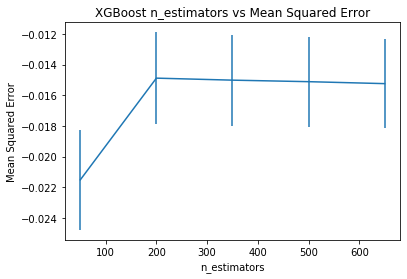

In [8]:
from matplotlib import pyplot

n_estimators = range(50, 800, 150)
parameters = dict(n_estimators=n_estimators)

print_cv_params(n_estimators, 'n_estimators', parameters)

[20:27:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -0.014989 using {'learning_rate': 0.12}
-132.943990 (0.485748) with: {'learning_rate': 0.0}
-0.330896 (0.013552) with: {'learning_rate': 0.03}
-0.017238 (0.003006) with: {'learning_rate': 0.06}
-0.015401 (0.002999) with: {'learning_rate': 0.09}
-0.014989 (0.003190) with: {'learning_rate': 0.12}
-0.015105 (0.002866) with: {'learning_rate': 0.15}
-0.015234 (0.003486) with: {'learning_rate': 0.18}


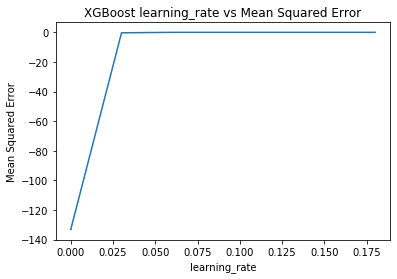

In [9]:
learning_rate = np.arange(0.0, 0.2, 0.03)
parameters = dict(learning_rate=learning_rate)

print_cv_params(learning_rate, 'learning_rate', parameters)

[20:27:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -0.015047 using {'max_depth': 5}
-0.132070 (0.021642) with: {'max_depth': 0}
-0.020471 (0.004062) with: {'max_depth': 1}
-0.016140 (0.003413) with: {'max_depth': 2}
-0.015266 (0.003057) with: {'max_depth': 3}
-0.015305 (0.002748) with: {'max_depth': 4}
-0.015047 (0.002836) with: {'max_depth': 5}
-0.015093 (0.003052) with: {'max_depth': 6}


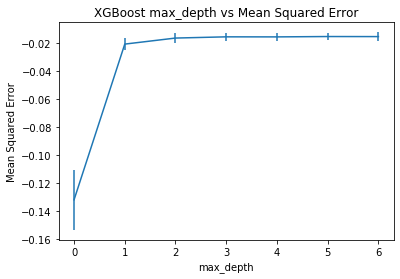

In [10]:
max_depth = range(0, 7)
parameters = dict(max_depth=max_depth)

print_cv_params(max_depth, 'max_depth', parameters)

[20:27:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -0.015266 using {'min_child_weight': 0.5}
-0.015266 (0.003057) with: {'min_child_weight': 0.5}
-0.015266 (0.003057) with: {'min_child_weight': 0.8}
-0.015500 (0.003030) with: {'min_child_weight': 1.1}
-0.015500 (0.003030) with: {'min_child_weight': 1.4000000000000001}
-0.015500 (0.003030) with: {'min_child_weight': 1.7000000000000002}


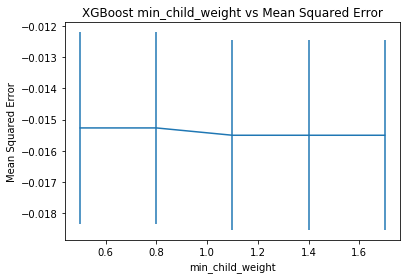

In [11]:
min_child_weight = np.arange(0.5, 2., 0.3)
parameters = dict(min_child_weight=min_child_weight)

print_cv_params(min_child_weight, 'min_child_weight', parameters)

[20:27:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -0.015201 using {'gamma': 0.010000000000000002}
-0.015271 (0.003106) with: {'gamma': 0.001}
-0.015309 (0.003103) with: {'gamma': 0.004}
-0.015234 (0.003143) with: {'gamma': 0.007}
-0.015201 (0.003131) with: {'gamma': 0.010000000000000002}


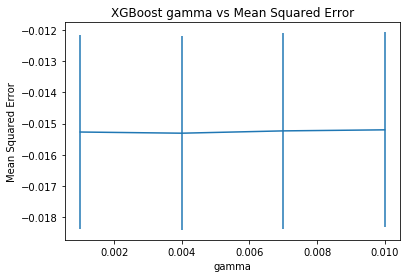

In [12]:
gamma = np.arange(.001, .01, .003)
parameters = dict(gamma=gamma)

print_cv_params(gamma, 'gamma', parameters)

[20:27:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -0.014876 using {'subsample': 0.7}
-0.015343 (0.003783) with: {'subsample': 0.3}
-0.015107 (0.002947) with: {'subsample': 0.5}
-0.014876 (0.002961) with: {'subsample': 0.7}
-0.014945 (0.003129) with: {'subsample': 0.9000000000000001}


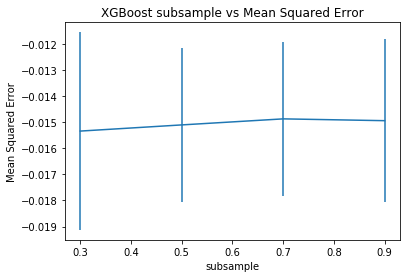

In [13]:
subsample = np.arange(0.3, 1., 0.2)
parameters = dict(subsample=subsample)

print_cv_params(subsample, 'subsample', parameters)

[20:27:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -0.015058 using {'colsample_bytree': 0.7}
-0.015193 (0.002950) with: {'colsample_bytree': 0.6}
-0.015058 (0.002683) with: {'colsample_bytree': 0.7}
-0.015253 (0.003125) with: {'colsample_bytree': 0.7999999999999999}
-0.015262 (0.002960) with: {'colsample_bytree': 0.8999999999999999}


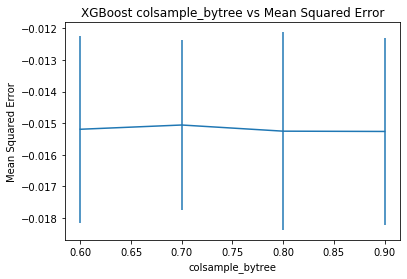

In [14]:
colsample_bytree = np.arange(.6, 1, .1)
parameters = dict(colsample_bytree=colsample_bytree)

print_cv_params(colsample_bytree, 'colsample_bytree', parameters)

In [15]:
parameters = {  'estimator__colsample_bytree':[.6],
                'estimator__subsample':[.7],
                'estimator__gamma':[.010000000000000002],
                'estimator__min_child_weight':[.5],
                'estimator__max_depth':[5],
                'estimator__learning_rate':[.12],
                'estimator__n_estimators':[200],                                                                    
                'estimator__reg_alpha':[0.75],
                'estimator__reg_lambda':[0.45],
                'estimator__seed':[42]
}

grid_search = GridSearchCV(estimator = model_xgb,
                        param_grid = parameters,
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        n_jobs = -1)

model_xgb = grid_search.fit(train_best, y)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_

[20:27:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
best_score

-0.015396157422963944

In [17]:
best_parameters

{'estimator__colsample_bytree': 0.6,
 'estimator__gamma': 0.010000000000000002,
 'estimator__learning_rate': 0.12,
 'estimator__max_depth': 5,
 'estimator__min_child_weight': 0.5,
 'estimator__n_estimators': 200,
 'estimator__reg_alpha': 0.75,
 'estimator__reg_lambda': 0.45,
 'estimator__seed': 42,
 'estimator__subsample': 0.7}

In [18]:
accuracies = cross_val_score(estimator=model_xgb, X=train_best, y=y, cv=10)
accuracies.mean()

[20:27:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:27:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:27:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:27:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:27:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:27:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:27:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:27:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:27:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:27:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


-0.015265561185909887

In [19]:
test_pred = test_dummies[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'OverallCond', 'LotArea', 'BsmtFinSF1', 'YearRemodAdd', 'BsmtUnfSF', 'LotFrontage', 'GarageYrBlt', '1stFlrSF', 'SaleCondition_Abnorml', 'OpenPorchSF']]

In [20]:
y_pred = model_xgb.predict(test_pred)
y_pred = np.floor(np.expm1(y_pred))

In [21]:
submission = pd.concat([test_id, pd.Series(y_pred)], 
                        axis=1,
                        keys=['Id','SalePrice'])

In [22]:
submission.head()

,Id,SalePrice
0,1461,133493.0
1,1462,166898.0
2,1463,177781.0
3,1464,179671.0
4,1465,198788.0


In [24]:
submission.to_csv('submission/most_relevant_ft_xgb_gscv2.csv', index = False)

In [25]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [27]:
import kaggle
kaggle.api.competition_submit("submission/most_relevant_ft_xgb_gscv2.csv", "most_relevant_ft", "house-prices-advanced-regression-techniques")

100%|██████████| 21.3k/21.3k [00:03<00:00, 5.62kB/s]
C:\Users\Utilisateur\Anaconda3\envs\detection_images\lib\site-packages\kaggle\api\kaggle_api_extended.py:515: ResourceWarning: unclosed <socket.socket fd=3664, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.103', 52024), raddr=('216.58.206.234', 443)>
  url_result['createUrl'], quiet)


Successfully submitted to House Prices: Advanced Regression Techniques

score kaggle : 0.14675